In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [137]:
mnist = fetch_mldata('MNIST original')

In [138]:
X, y = mnist["data"], mnist["target"]
# X.shape

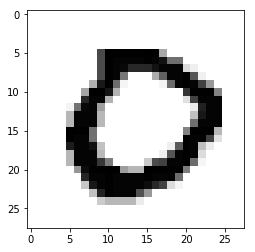

In [139]:
some_digit = X[5000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,interpolation="nearest")
plt.show()

In [140]:
# Splitting the Data

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [141]:
# Shuffling the Training Data
shuffle_index = np.random.permutation(60000)

In [142]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [143]:
# Fitting the Data to our Model
#a = 0.005
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [144]:
sgd_clf.predict([some_digit])

array([ 0.])

In [145]:
# Cross Validation Score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([ 0.83358328,  0.82914146,  0.82907436])

In [146]:
# Scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [147]:
# Cross Validation Score on Scaled Data

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

array([ 0.91021796,  0.90824541,  0.90943642])

In [148]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
# y_train_pred

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

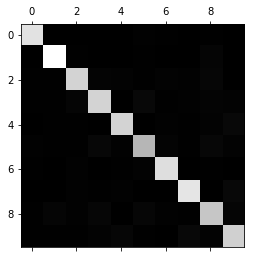

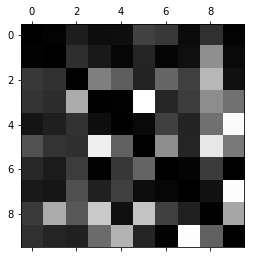

In [149]:
# Confusion Matrices

confusion_matrix = confusion_matrix(y_train, y_train_pred)
#confusion_matrix
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [150]:
# Performance Evaluation

y_sgd_pred = sgd_clf.predict(X_test)

In [151]:
accuracy_score(y_test, y_sgd_pred)
print (precision_score(y_train, y_train_pred, average = None))
print (precision_score(y_train, y_train_pred, average = 'weighted'))

[ 0.94666225  0.94639719  0.91081173  0.89465776  0.9230371   0.87761705
  0.93388704  0.92983018  0.85072857  0.86914964]
0.909161863943


In [152]:
print(recall_score(y_train, y_train_pred, average = None))
print(recall_score(y_train, y_train_pred, average = 'weighted'))

[ 0.96488266  0.9584693   0.89644176  0.87408253  0.91561109  0.85058107
  0.9499831   0.9264166   0.85814391  0.88653555]
0.9093


In [153]:
print(f1_score(y_train, y_train_pred, average = None))
print(f1_score(y_train, y_train_pred, average = 'weighted'))

[ 0.95568562  0.95239499  0.90356962  0.88425047  0.9193091   0.86388759
  0.94186631  0.92812025  0.85442015  0.87775651]
0.909162378633


In [154]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([[  532770.13445405, -1082371.38489372,  -401766.69632459,
         -678952.58142749,  -862499.67449805,  -651681.24885586,
         -292505.75017088,  -817203.86220961,  -560250.56410193,
        -1141392.39668722]])

In [155]:
y_train_all = (y_train == [0 or 1 or 2 or 3 or 4 or 5 or 6 or 7 or 8 or 9])
y_train_all

array([False, False, False, ..., False, False, False], dtype=bool)

In [156]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_all, cv=3, method = "decision_function")

if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will b

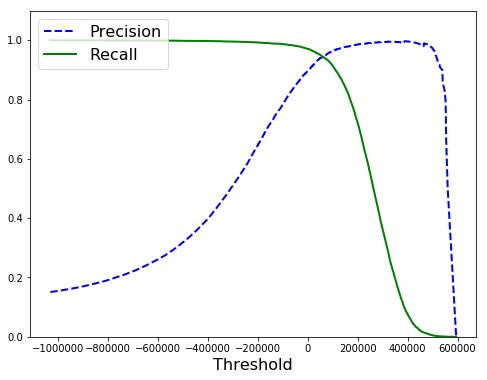

In [157]:
precisions, recalls, thresholds = precision_recall_curve(y_train_all, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1.1])

plt.figure(figsize=(8, 6))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
# plt.xlim([-700000, 700000])
plt.show()

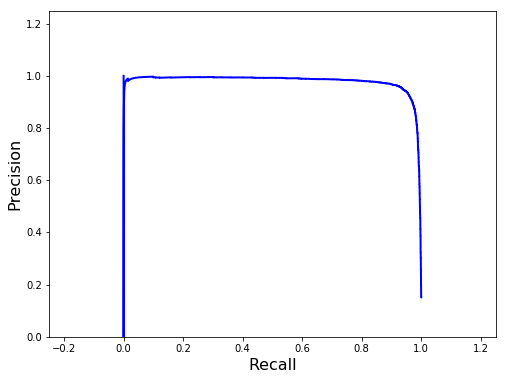

In [158]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([-0.25, 1.25, 0, 1.25])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

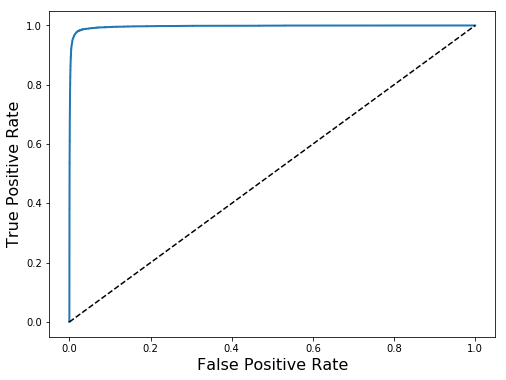

In [159]:
fpr, tpr, thresholds = roc_curve(y_train_all, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()